In [4]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [5]:
url = "https://raw.githubusercontent.com/datasciencedojo/datasets/master/titanic.csv"
df = pd.read_csv(url)

In [6]:
#1. Δομή του πίνακα
df.head()  # Δείχνει τις πρώτες 5 γραμμές

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [7]:
df.info()          # Πληροφορίες στηλών, τύποι δεδομένων
df.describe()      # Στατιστικά για αριθμητικά πεδία

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [8]:
df.isnull().sum() #2. Έλεγχος για ελλιπή δεδομένα

,0
PassengerId,0
Survived,0
Pclass,0
Name,0
Sex,0
Age,177
SibSp,0
Parch,0
Ticket,0
Fare,0


In [9]:
#3. Επιλογή συγκεκριμένων στηλών
df[['Name', 'Sex', 'Survived']].head()

,Name,Sex,Survived
0,"Braund, Mr. Owen Harris",male,0
1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,1
2,"Heikkinen, Miss. Laina",female,1
3,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,1
4,"Allen, Mr. William Henry",male,0


In [10]:
#4. Φιλτράρισμα: Ποιοι άντρες δεν επιβίωσαν;
df[(df['Sex'] == 'male') & (df['Survived'] == 0)]

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
5,6,0,3,"Moran, Mr. James",male,NaN,0,0,330877,8.4583,NaN,Q
6,7,0,1,"McCarthy, Mr. Timothy J",male,54.0,0,0,17463,51.8625,E46,S
7,8,0,3,"Palsson, Master. Gosta Leonard",male,2.0,3,1,349909,21.0750,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...,...
881,882,0,3,"Markun, Mr. Johann",male,33.0,0,0,349257,7.8958,NaN,S
883,884,0,2,"Banfield, Mr. Frederick James",male,28.0,0,0,C.A./SOTON 34068,10.5000,NaN,S
884,885,0,3,"Sutehall, Mr. Henry Jr",male,25.0,0,0,SOTON/OQ 392076,7.0500,NaN,S
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,NaN,S


In [11]:
#5. Ομαδοποίηση: Ποσοστά επιβίωσης ανά φύλο
df.groupby('Sex')['Survived'].mean()

,Survived
Sex,
female,0.742038
male,0.188908


In [12]:
#Ποια ηλικιακή ομάδα (0–18, 19–50, 51+) είχε τα μεγαλύτερα ποσοστά επιβίωσης;
bins = [0, 18, 50, 100]
labels = ['Παιδια-Εφηβοι', 'Ενηλικες', 'Ηλικιωμενοι']

df['AgeGroup'] = pd.cut(df['Age'], bins=bins, labels=labels)

df[['Age', "AgeGroup"]].head(5)

,Age,AgeGroup
0,22.0,Ενηλικες
1,38.0,Ενηλικες
2,26.0,Ενηλικες
3,35.0,Ενηλικες
4,35.0,Ενηλικες


In [13]:
df.groupby('AgeGroup')['Survived'].mean()

/tmp/ipython-input-13-2140893742.py:1: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  df.groupby('AgeGroup')['Survived'].mean()


,Survived
AgeGroup,
Παιδια-Εφηβοι,0.503597
Ενηλικες,0.387476
Ηλικιωμενοι,0.343750


In [14]:
df.groupby('Pclass')['Survived'].mean()

,Survived
Pclass,
1,0.629630
2,0.472826
3,0.242363


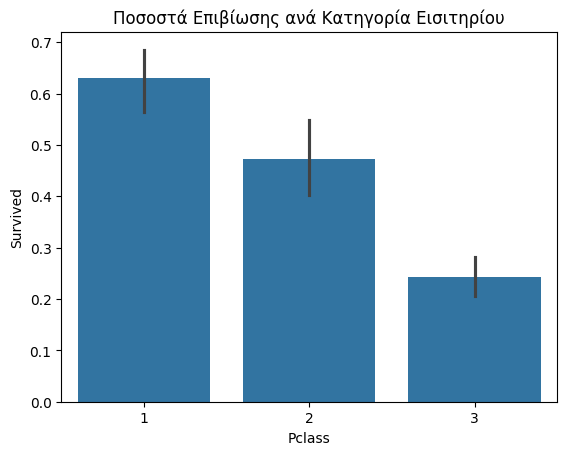

In [15]:
import seaborn as sns
import matplotlib.pyplot as plt

sns.barplot(x='Pclass', y='Survived', data=df)
plt.title('Ποσοστά Επιβίωσης ανά Κατηγορία Εισιτηρίου')
plt.show()

In [18]:
# Ημερα 2η

In [19]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# φορτώνουμε ξανά το dataset
df = pd.read_csv("https://raw.githubusercontent.com/datasciencedojo/datasets/master/titanic.csv")


In [23]:
df = df[["Survived", "Pclass", "Sex", "Age", "Fare"]]
df.dropna(inplace=True)


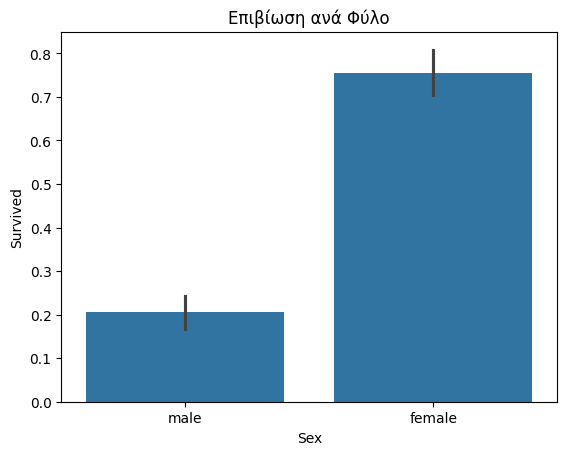

In [21]:
sns.barplot(x="Sex", y="Survived", data=df)
plt.title("Επιβίωση ανά Φύλο")
plt.show()


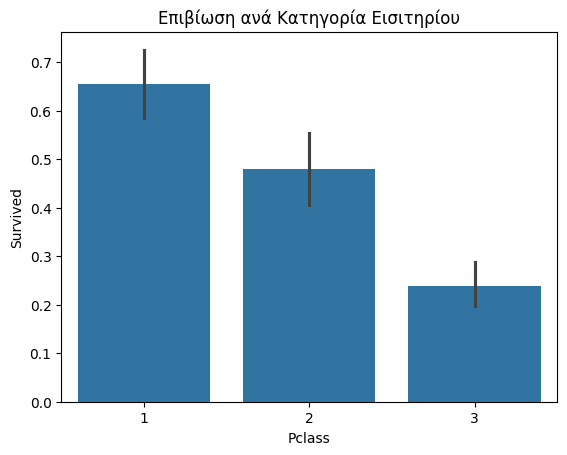

In [24]:
sns.barplot(x="Pclass", y="Survived", data=df)
plt.title("Επιβίωση ανά Κατηγορία Εισιτηρίου")
plt.show()



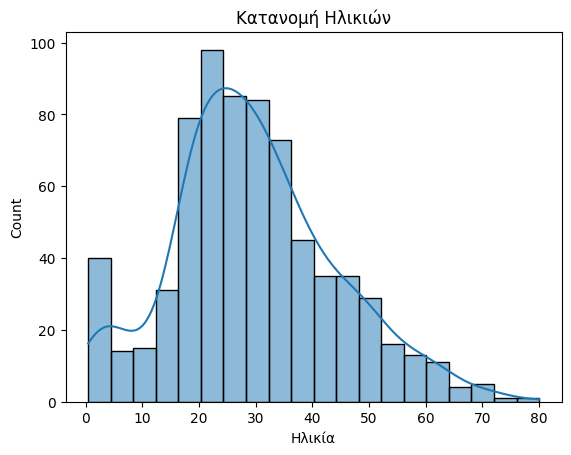

In [25]:
sns.histplot(df["Age"], kde=True)
plt.title("Κατανομή Ηλικιών")
plt.xlabel("Ηλικία")
plt.show()


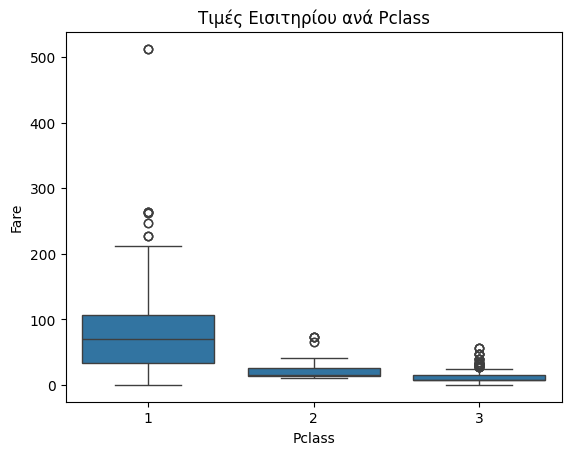

In [26]:
sns.boxplot(x="Pclass", y="Fare", data=df)
plt.title("Τιμές Εισιτηρίου ανά Pclass")
plt.show()


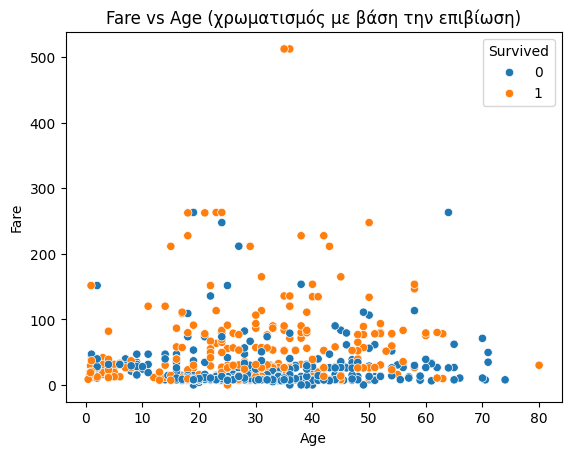

In [27]:
sns.scatterplot(x="Age", y="Fare", hue="Survived", data=df)
plt.title("Fare vs Age (χρωματισμός με βάση την επιβίωση)")
plt.show()


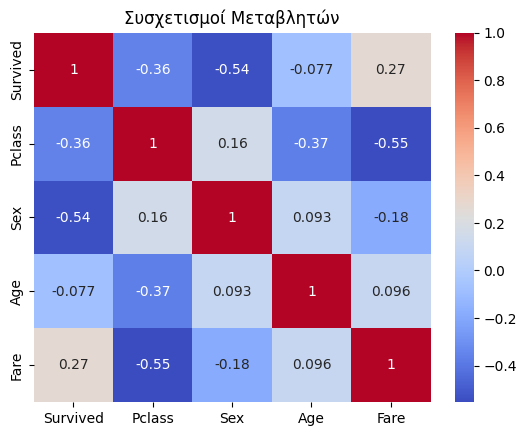

In [29]:
df_corr = df.copy()

# Μετατροπή της στήλης "Sex" σε αριθμό
df_corr["Sex"] = df_corr["Sex"].map({"male": 1, "female": 0})

# Υπολογισμός συσχετισμών
corr = df_corr.corr()

# Heatmap
sns.heatmap(corr, annot=True, cmap='coolwarm')
plt.title("Συσχετισμοί Μεταβλητών")
plt.show()


# New section - Logistic Regression στο Titanic

In [30]:
import pandas as pd

# Φόρτωση dataset
url = "https://raw.githubusercontent.com/datasciencedojo/datasets/master/titanic.csv"
df = pd.read_csv(url)

# Επιλέγουμε βασικά χαρακτηριστικά
df = df[["Survived", "Pclass", "Sex", "Age", "SibSp", "Parch", "Fare"]]

# Αφαίρεση γραμμών με NaN
df.dropna(inplace=True)

# Μετατροπή κατηγορικών τιμών σε αριθμούς
df["Sex"] = df["Sex"].map({"male": 1, "female": 0})


In [31]:
X = df.drop("Survived", axis=1)  # χαρακτηριστικά
y = df["Survived"]               # στόχος


In [35]:
df

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare
0,0,3,1,22.0,1,0,7.2500
1,1,1,0,38.0,1,0,71.2833
2,1,3,0,26.0,0,0,7.9250
3,1,1,0,35.0,1,0,53.1000
4,0,3,1,35.0,0,0,8.0500
...,...,...,...,...,...,...,...
885,0,3,0,39.0,0,5,29.1250
886,0,2,1,27.0,0,0,13.0000
887,1,1,0,19.0,0,0,30.0000
889,1,1,1,26.0,0,0,30.0000


In [36]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)


In [37]:
from sklearn.linear_model import LogisticRegression

model = LogisticRegression(max_iter=1000)
model.fit(X_train, y_train)


LogisticRegression(max_iter=1000)

In [38]:
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

y_pred = model.predict(X_test)

print("Accuracy:", accuracy_score(y_test, y_pred))
print("\nClassification Report:\n", classification_report(y_test, y_pred))
print("\nConfusion Matrix:\n", confusion_matrix(y_test, y_pred))


Accuracy: 0.7482517482517482

Classification Report:
               precision    recall  f1-score   support

           0       0.78      0.82      0.80        87
           1       0.69      0.64      0.67        56

    accuracy                           0.75       143
   macro avg       0.74      0.73      0.73       143
weighted avg       0.75      0.75      0.75       143


Confusion Matrix:
 [[71 16]
 [20 36]]


In [39]:
import numpy as np

# Παράδειγμα επιβάτη: 3η θέση, άνδρας, 25 ετών, χωρίς συγγενείς, φτηνό εισιτήριο
new_passenger = np.array([[3, 1, 25, 0, 0, 7.25]])
prediction = model.predict(new_passenger)
print("Πρόβλεψη:", "ΕΠΙΒΙΩΣΕ" if prediction[0] == 1 else "ΔΕΝ ΕΠΙΒΙΩΣΕ")


Πρόβλεψη: ΔΕΝ ΕΠΙΒΙΩΣΕ


/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but LogisticRegression was fitted with feature names
  warnings.warn(




```
# This is formatted as code
```

# New section - Ημερα 4

In [42]:
import pandas as pd

# Φόρτωση δεδομένων
url = "https://raw.githubusercontent.com/datasciencedojo/datasets/master/titanic.csv"
df = pd.read_csv(url)

# Επιλογή χρήσιμων χαρακτηριστικών
df = df[["Survived", "Pclass", "Sex", "Age", "SibSp", "Parch", "Fare"]]
df.dropna(inplace=True)

# Μετατροπή του "Sex" σε αριθμητική μορφή: male=1, female=0
df["Sex"] = df["Sex"].map({"male": 1, "female": 0})


In [43]:
X = df.drop("Survived", axis=1)  # X = όλα εκτός από τη στήλη στόχο
y = df["Survived"]               # y = τι προσπαθούμε να προβλέψουμε


In [44]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)


In [45]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(
    X_scaled, y, test_size=0.2, random_state=42
)


In [46]:
from sklearn.linear_model import LogisticRegression

model = LogisticRegression(max_iter=1000)
model.fit(X_train, y_train)


LogisticRegression(max_iter=1000)

In [47]:
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

y_pred = model.predict(X_test)

print("Accuracy:", accuracy_score(y_test, y_pred))
print("\nClassification Report:\n", classification_report(y_test, y_pred))


Accuracy: 0.7482517482517482

Classification Report:
               precision    recall  f1-score   support

           0       0.78      0.82      0.80        87
           1       0.69      0.64      0.67        56

    accuracy                           0.75       143
   macro avg       0.74      0.73      0.73       143
weighted avg       0.75      0.75      0.75       143



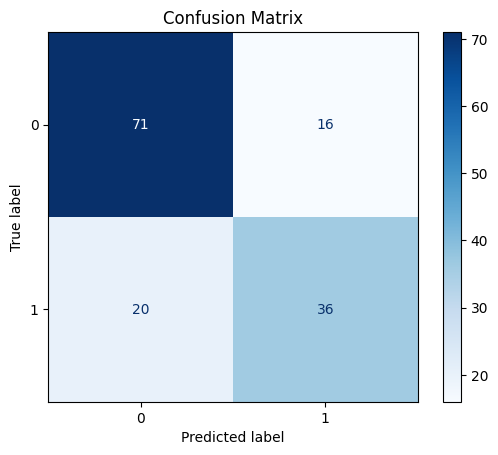

In [48]:
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.metrics import ConfusionMatrixDisplay

ConfusionMatrixDisplay.from_estimator(model, X_test, y_test, cmap="Blues")
plt.title("Confusion Matrix")
plt.show()


In [49]:
from sklearn.model_selection import GridSearchCV

params = {'C': [0.01, 0.1, 1, 10, 100]}  # C = regularization strength
grid = GridSearchCV(LogisticRegression(max_iter=1000), params, cv=5)
grid.fit(X_train, y_train)

print("Best parameters:", grid.best_params_)
print("Best score:", grid.best_score_)


Best parameters: {'C': 10}
Best score: 0.8144012204424105
